In [118]:
import pandas as pd
import json

In [119]:
# Reading the given CSV data
df = pd.read_csv('House_Rent_Train - House_Rent_Prediction.csv')
pd.set_option('display.max_columns',100)

In [120]:
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25.0,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4.0,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6.0,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3.0,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15.0,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [121]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [122]:
# Unique column doesnot add value to this analusis
df.drop(['id'],axis=1,inplace = True) 

In [123]:
df.isnull().sum()

type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [124]:
#In the data above, 15 columns have 23 missing values. These 23 missing values belong to the same 23 rows , so remove those rows
index = df[df.isnull().sum(axis=1) > 15].index
index

Int64Index([20532, 20533, 20534, 20535, 20536, 20537, 20538, 20539, 20540,
            20541, 20542, 20543, 20544, 20545, 20546, 20547, 20548, 20549,
            20550, 20551, 20552, 20553, 20554],
           dtype='int64')

In [125]:
df.drop(index, axis=0, inplace=True)

In [126]:
df.isnull().sum()

type                18
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [127]:
# Fill the missing values with the mode (since it is a categorical column)
df['type'] = df['type'].fillna(df['type'].mode().values[0])
df['locality'] = df['locality'].fillna(df['locality'].mode().values[0])

In [128]:
df.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [129]:
# Spliting month , year and day
df['activation_date']= pd.to_datetime(df['activation_date'], errors='coerce')
df['activation_year'] = df['activation_date'].dt.year
df['activation_month'] = df['activation_date'].dt.month
df['activation_day'] = df['activation_date'].dt.day

In [130]:
df['amenities'].iloc[1]

'{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [134]:
# Function to convert JSON string to dictionary
def parse_amenities(x):
    try:
        return json.loads(x)
    except json.JSONDecodeError:
        return {}

# Apply the parsing function to the 'amenities' column and expand into separate columns
amenities_df = pd.json_normalize(df['amenities'].apply(parse_amenities))

In [135]:
amenities_df.isnull().sum()

LIFT           0
GYM           62
INTERNET       0
AC             0
CLUB        1067
INTERCOM       0
POOL           0
CPA         1067
FS             0
SERVANT     1067
SECURITY       0
SC             0
GP          1067
PARK           0
RWH         1067
STP         1067
HK             0
PB             0
VP          1067
dtype: int64

In [136]:
amenities_df.columns

Index(['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA',
       'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK',
       'PB', 'VP'],
      dtype='object')

In [137]:
# Fill the missing values with the mode (since it is a categorical column)
amenities_df['CLUB'] = amenities_df['CLUB'].fillna(amenities_df['CLUB'].mode().values[0])
amenities_df['CPA'] = amenities_df['CPA'].fillna(amenities_df['CPA'].mode().values[0])
amenities_df['SERVANT'] = amenities_df['SERVANT'].fillna(amenities_df['SERVANT'].mode().values[0])
amenities_df['GP'] = amenities_df['GP'].fillna(amenities_df['GP'].mode().values[0])
amenities_df['RWH'] = amenities_df['RWH'].fillna(amenities_df['RWH'].mode().values[0])
amenities_df['STP'] = amenities_df['STP'].fillna(amenities_df['STP'].mode().values[0])
amenities_df['VP'] = amenities_df['VP'].fillna(amenities_df['VP'].mode().values[0])
amenities_df['GYM'] = amenities_df['GYM'].fillna(amenities_df['GYM'].mode().values[0])

In [138]:
amenities_df.isnull().sum()

LIFT        0
GYM         0
INTERNET    0
AC          0
CLUB        0
INTERCOM    0
POOL        0
CPA         0
FS          0
SERVANT     0
SECURITY    0
SC          0
GP          0
PARK        0
RWH         0
STP         0
HK          0
PB          0
VP          0
dtype: int64

In [139]:
Final_df = pd.concat([df, amenities_df], axis=1)

In [140]:
Final_df.drop(['amenities','activation_date'],axis=1,inplace=True)

In [141]:
Final_df.isnull().sum()

type                0
locality            0
latitude            0
longitude           0
lease_type          0
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
water_supply        0
building_type       0
balconies           0
rent                0
activation_year     0
activation_month    0
activation_day      0
LIFT                0
GYM                 0
INTERNET            0
AC                  0
CLUB                0
INTERCOM            0
POOL                0
CPA                 0
FS                  0
SERVANT             0
SECURITY            0
SC                  0
GP                  0
PARK                0
RWH                 0
STP                 0
HK                  0
PB                  0
VP                  0
dtype: int64

In [142]:
df = Final_df.drop_duplicates()

In [143]:
# The column 'type' has some misleading values .
df['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3'], dtype=object)

In [144]:
pd.options.mode.copy_on_write = True
df['type'] = df['type'].str.upper()

In [145]:
df['type'] = df['type'].replace('1BHK1','BHK1')

In [146]:
df['type'].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS'], dtype=object)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20500 entries, 0 to 20499
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              20500 non-null  object 
 1   locality          20500 non-null  object 
 2   latitude          20500 non-null  float64
 3   longitude         20500 non-null  float64
 4   lease_type        20500 non-null  object 
 5   gym               20500 non-null  int64  
 6   lift              20500 non-null  int64  
 7   swimming_pool     20500 non-null  int64  
 8   negotiable        20500 non-null  int64  
 9   furnishing        20500 non-null  object 
 10  parking           20500 non-null  object 
 11  property_size     20500 non-null  int64  
 12  property_age      20500 non-null  float64
 13  bathroom          20500 non-null  float64
 14  facing            20500 non-null  object 
 15  cup_board         20500 non-null  float64
 16  floor             20500 non-null  float6

In [148]:
# Converting them to reliable data type
df['property_age'] = df['property_age'].astype(int)
df['bathroom'] = df['bathroom'].astype(int)
df['cup_board'] = df['cup_board'].astype(int)
df = df.astype({'floor': int, 'total_floor': int, 'balconies': int,'rent': int,
                'INTERNET': int, 'AC': int, 'CLUB': int,'INTERCOM': int, 
                'SERVANT': int, 'SECURITY': int, 'LIFT': int, 'GYM': int,'POOL': int, 
                'CPA': int, 'FS': int, 'GP': int, 'PARK': int,'RWH': int, 
                'STP': int, 'HK': int, 'PB': int, 'VP': int , 'SC': int})

In [149]:
df.shape

(20500, 44)

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

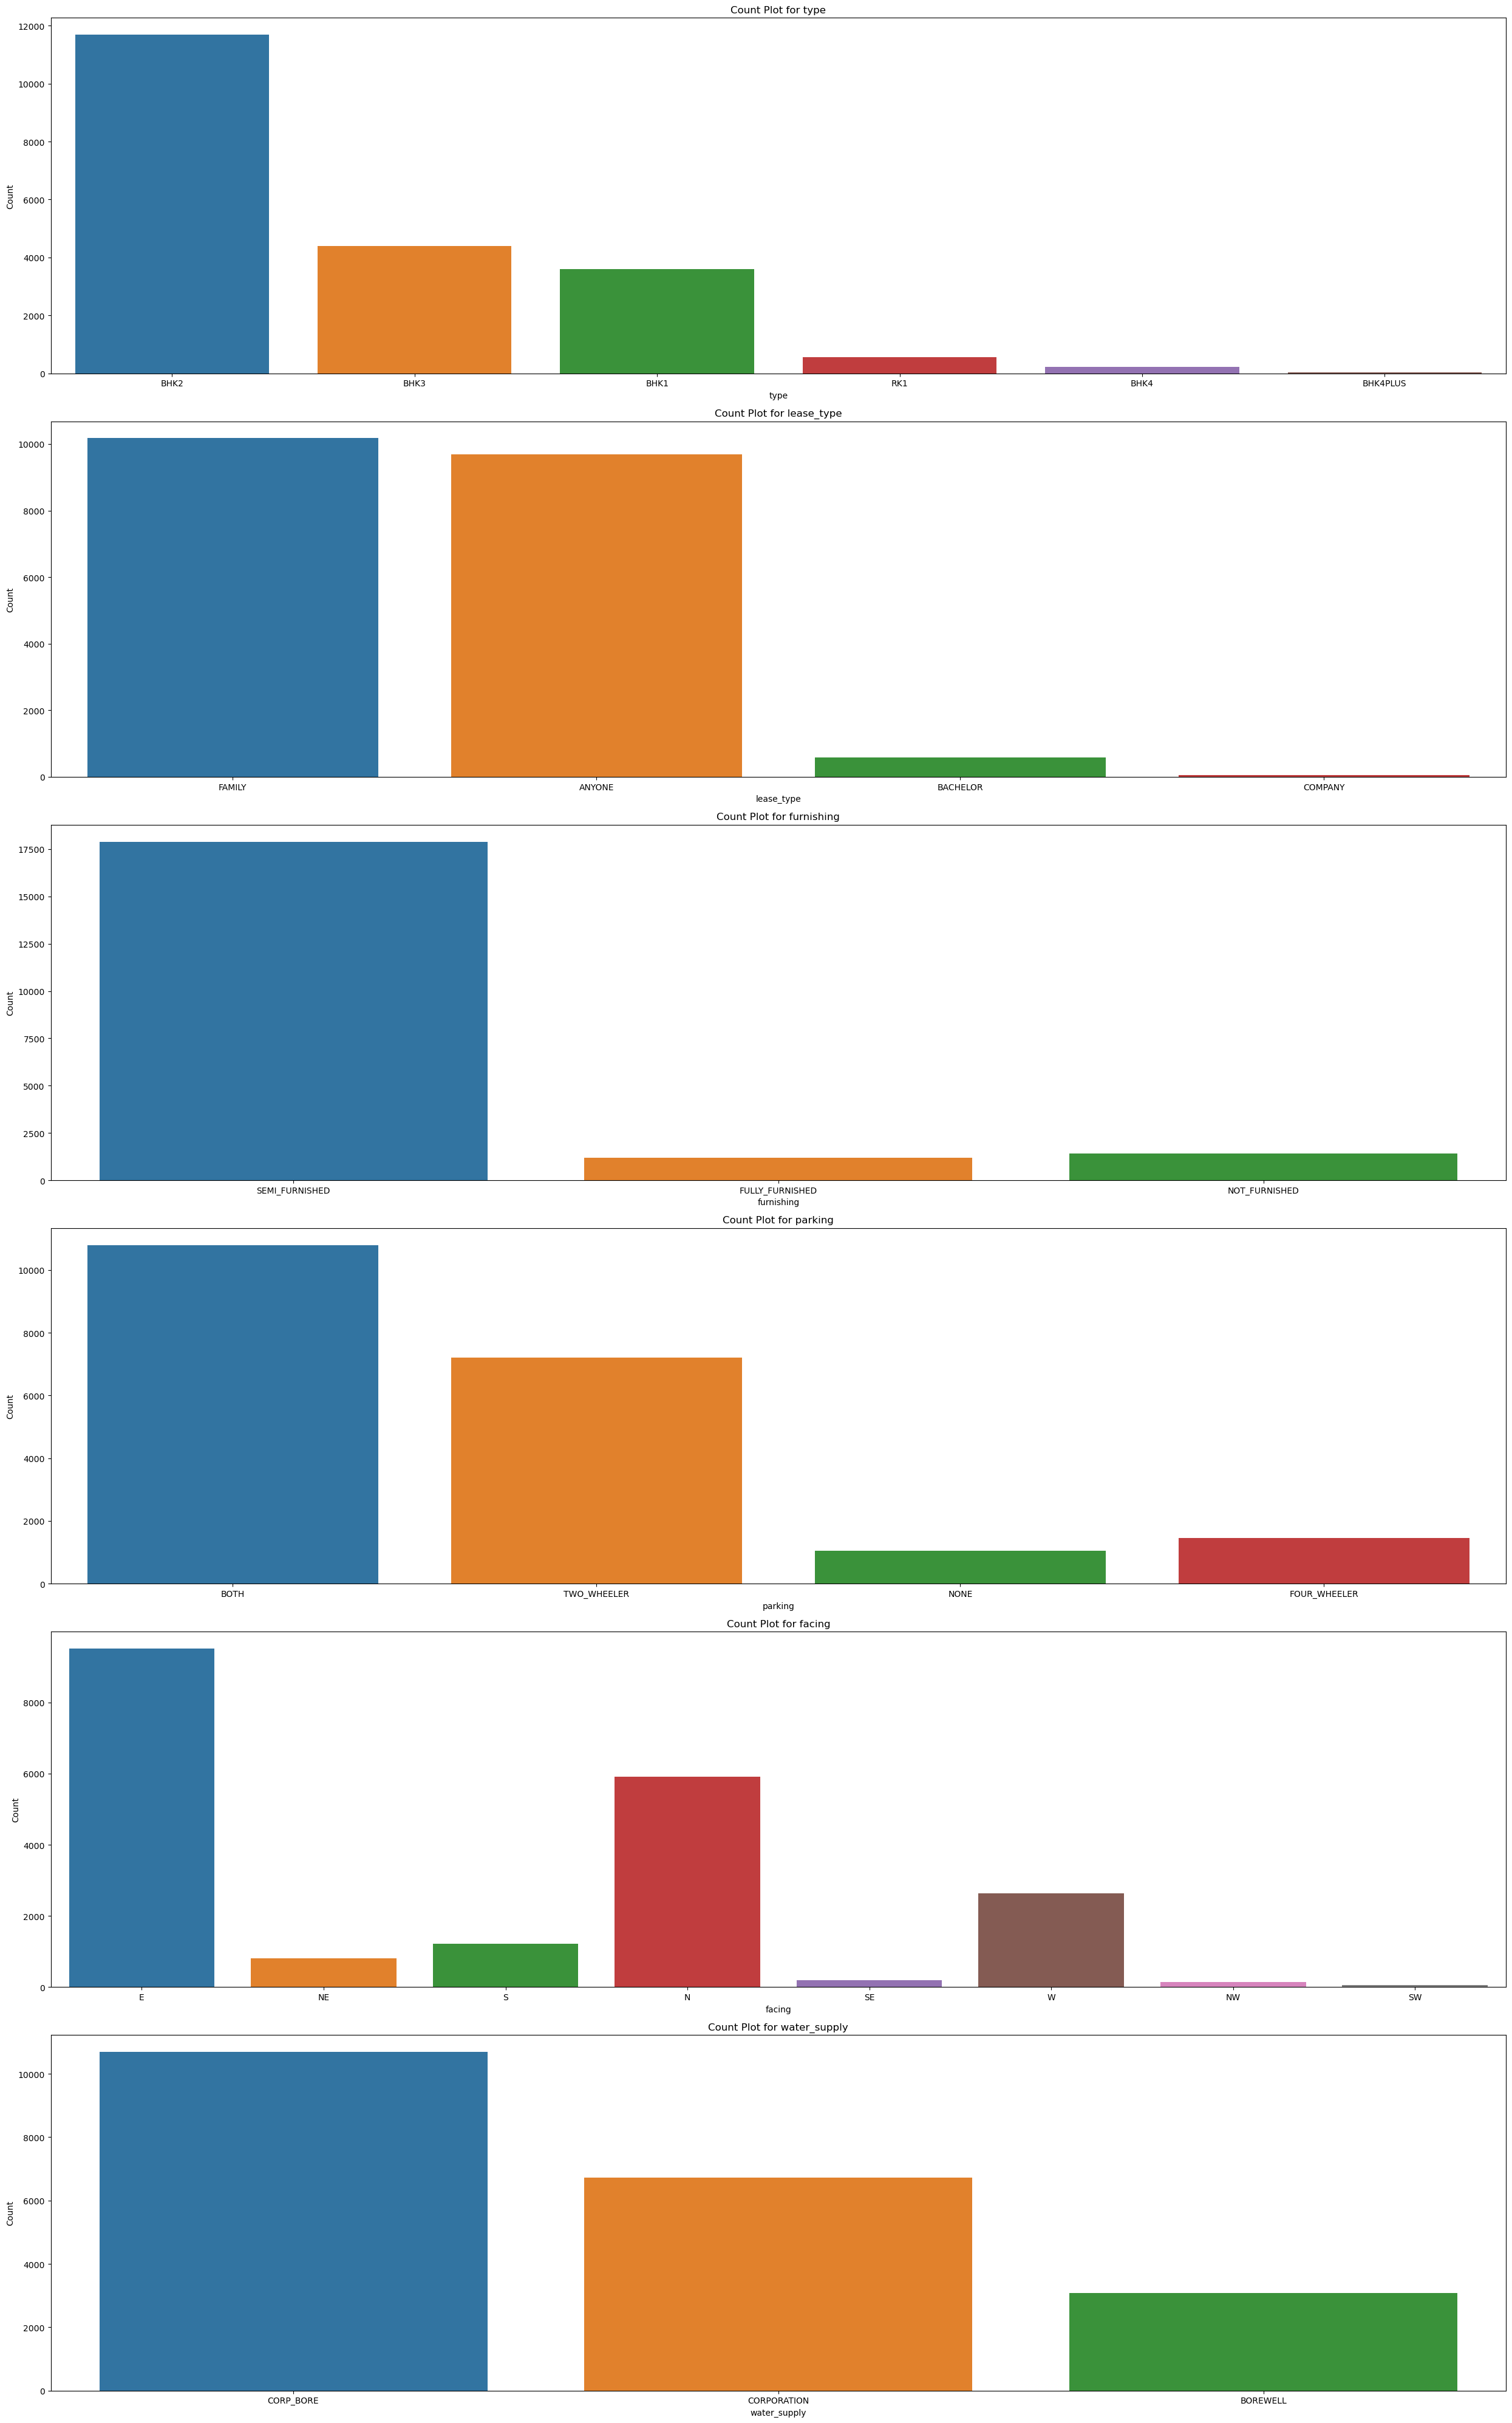

In [33]:
# List of categorical columns
categorical_columns = ['type', 'lease_type', 'furnishing','parking','facing','water_supply']

# Set up the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(25, 40))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### In the above plot 
- we can understand that most of the buildings are 2 BHK, with very few being 4 BHK or more. 
- There are more family members renting houses compared to companies. 
- Most houses have parking available(both two wheeler and four wheeler), with very few having no parking. 
- Many buildings face east, indicating a belief in astrology. 
- In the area where the buildings are located, most use corporation bore wells for their water supply.

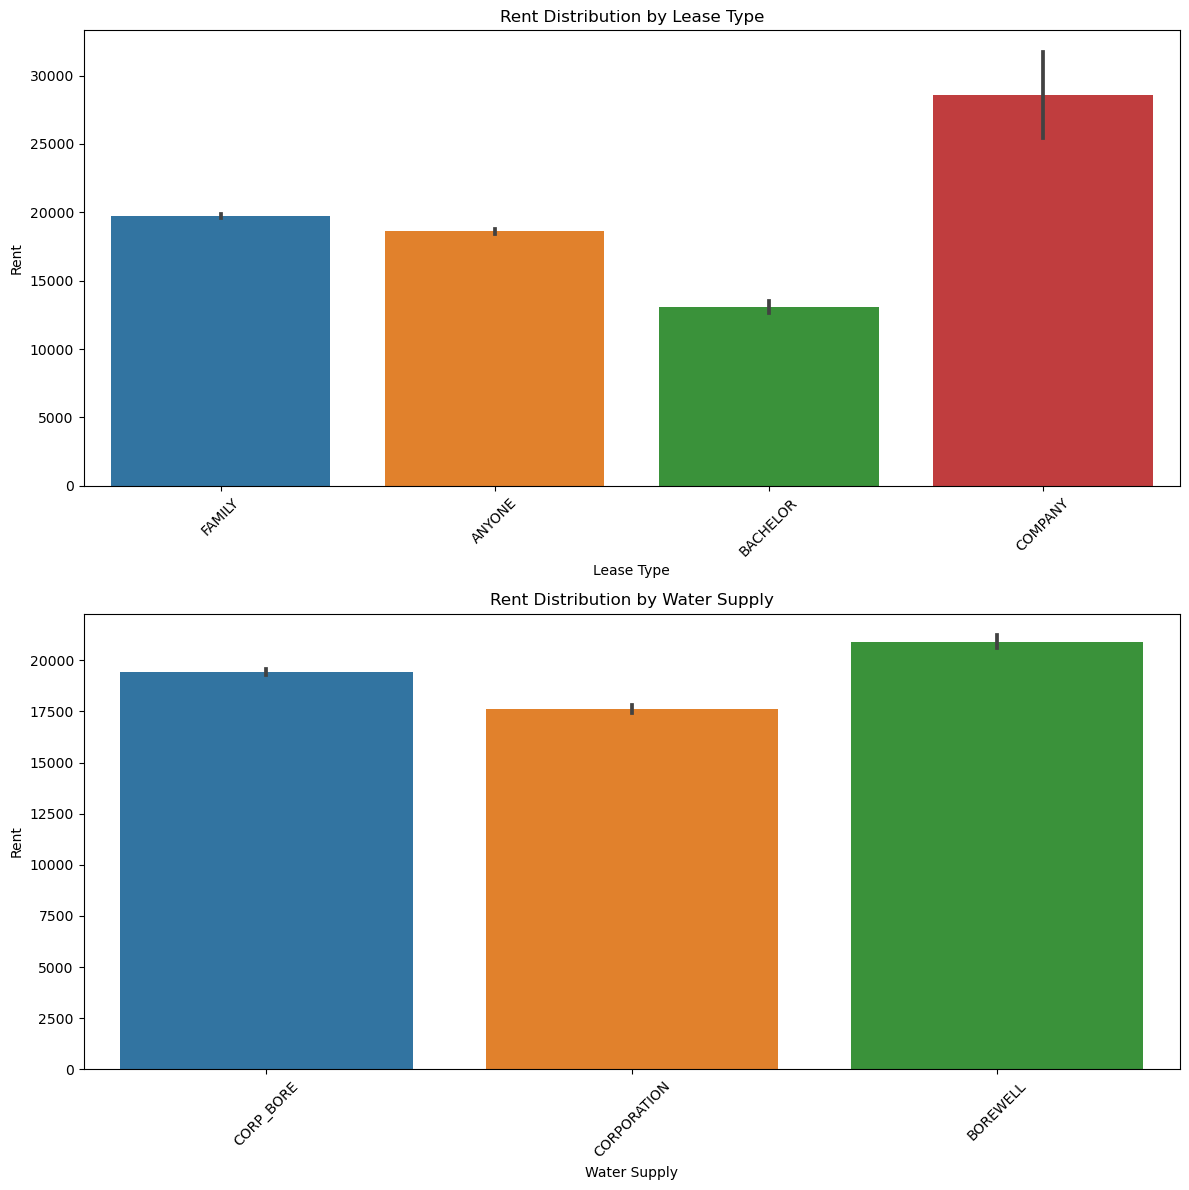

In [34]:
# Set up the figure
plt.figure(figsize=(12, 12))

# First subplot
plt.subplot(2, 1, 1)
sns.barplot(x='lease_type', y='rent', data=df)
plt.title('Rent Distribution by Lease Type')
plt.xlabel('Lease Type')
plt.ylabel('Rent')
plt.xticks(rotation=45)

# Second subplot
plt.subplot(2, 1, 2)
sns.barplot(x='water_supply', y='rent', data=df)
plt.title('Rent Distribution by Water Supply')
plt.xlabel('Water Supply')
plt.ylabel('Rent')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

* Comparing lease types, we found that companies are willing to pay more rent. Instead of renting to bachelors, we can rent to companies. Alternatively, we can also rent to families.<br>
* Water is mandatory for the building. When we consider borewell maintenance, the cost is slightly higher, so we offer more rent. From the above analysis, we found a significant difference in water supply.


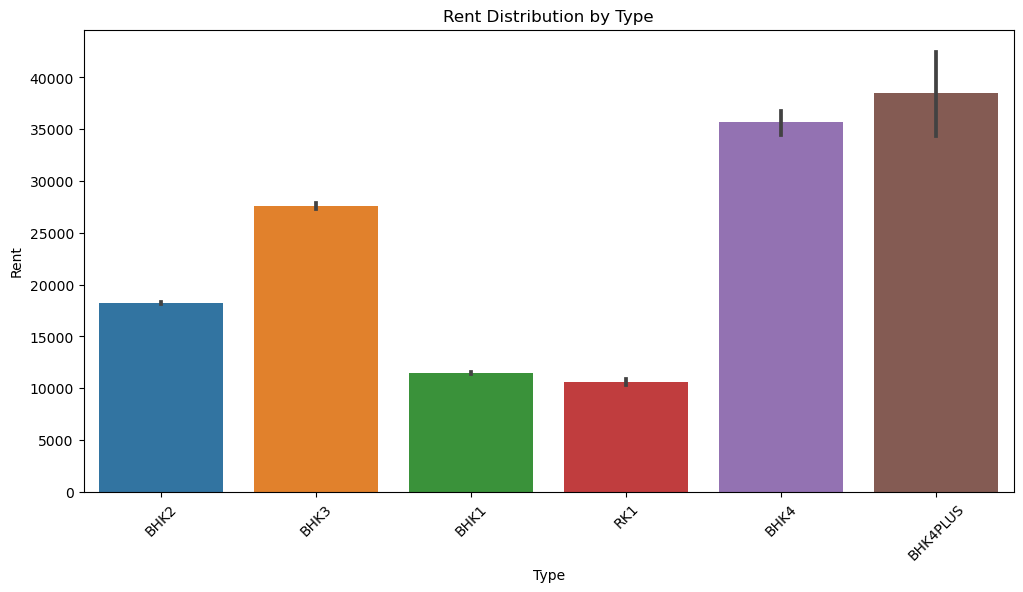

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='type' , y='rent' , data=df)
plt.title('Rent Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Rent')
plt.show()

*Nowadays, people expect more rooms for their privacy and also for working. Therefore, for higher rent, we need building types like 3+ BHK.*

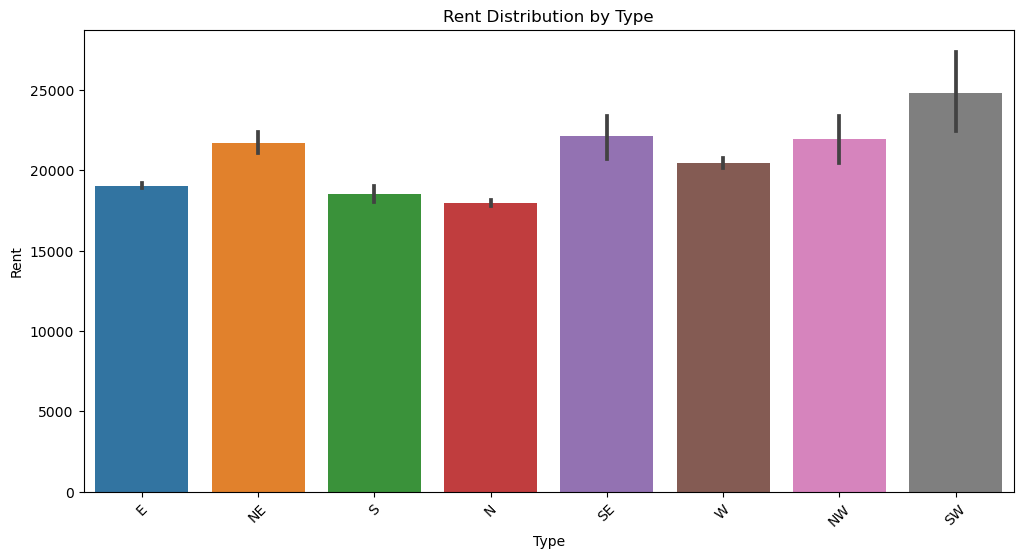

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='facing' , y='rent' , data=df)
plt.title('Rent Distribution by Facing')
plt.xlabel('Facing')
plt.ylabel('Rent')
plt.show()

*In the given data on building facing analysis, we found that rents for east, west, north, and south-facing buildings are lower compared to those for northeast, southeast, northwest, and southwest-facing buildings. This is a surprising result. All facings have minor differences.*

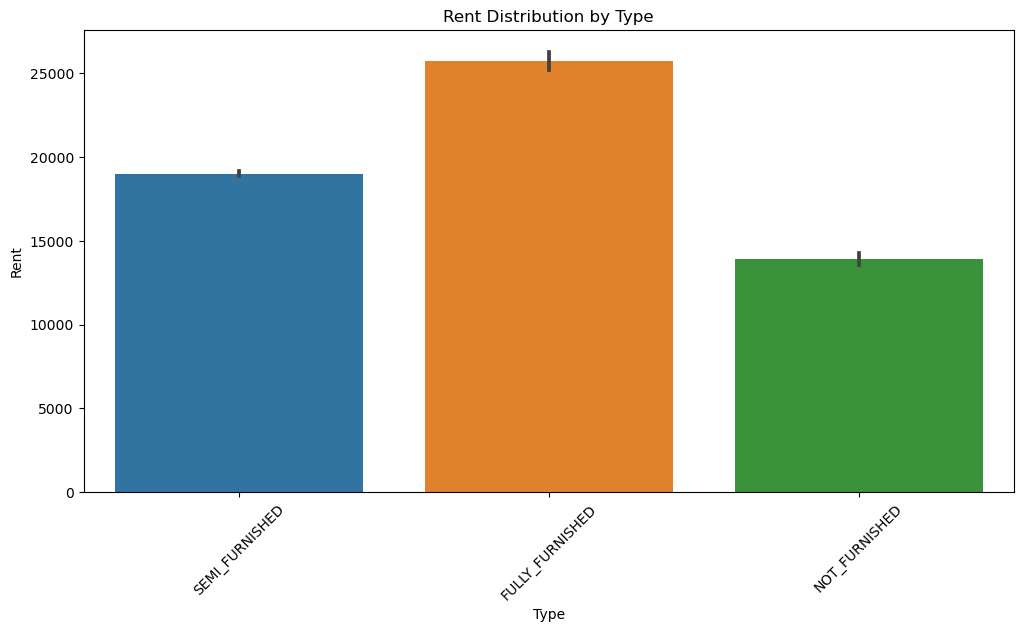

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x='furnishing' , y='rent' , data=df)
plt.title('Rent Distribution by Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Rent')
plt.show()

*Most people are willing to pay higher rent for fully furnished houses, while very few are willing to pay high rent for unfurnished ones.*

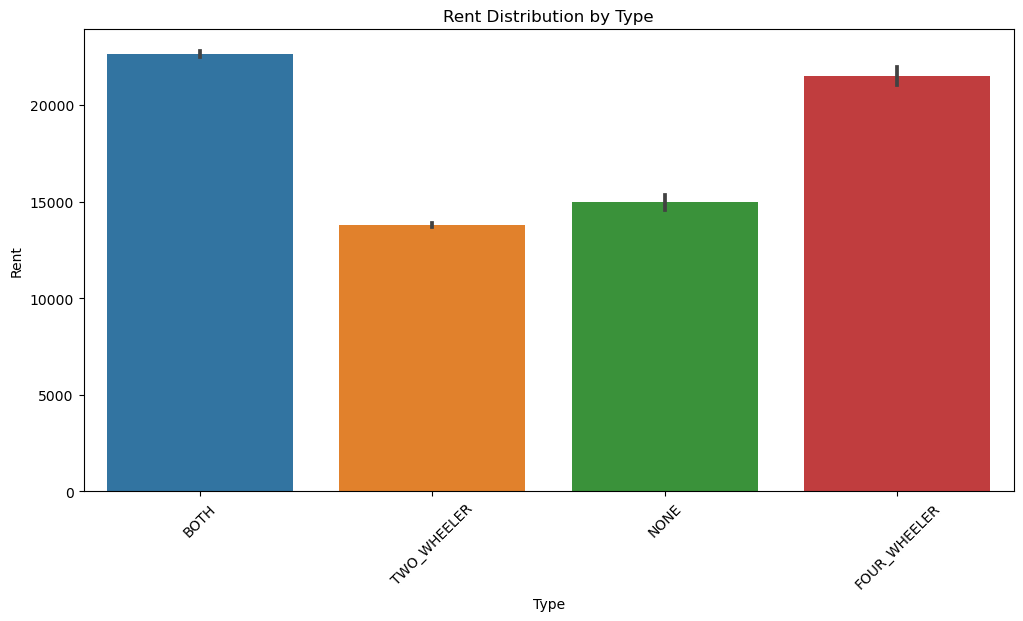

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='parking' , y='rent' , data=df)
plt.title('Rent Distribution by Parking')
plt.xlabel('Parking')
plt.ylabel('Rent')
plt.show()

*Nowadays, most working professionals use cars. In the above plot, we can see that rent is higher for buildings with four-wheeler parking or both types of parking. Buildings without parking also have high rent due to college students or bachelors. The best solution is to provide four-wheeler parking or leave parking.*

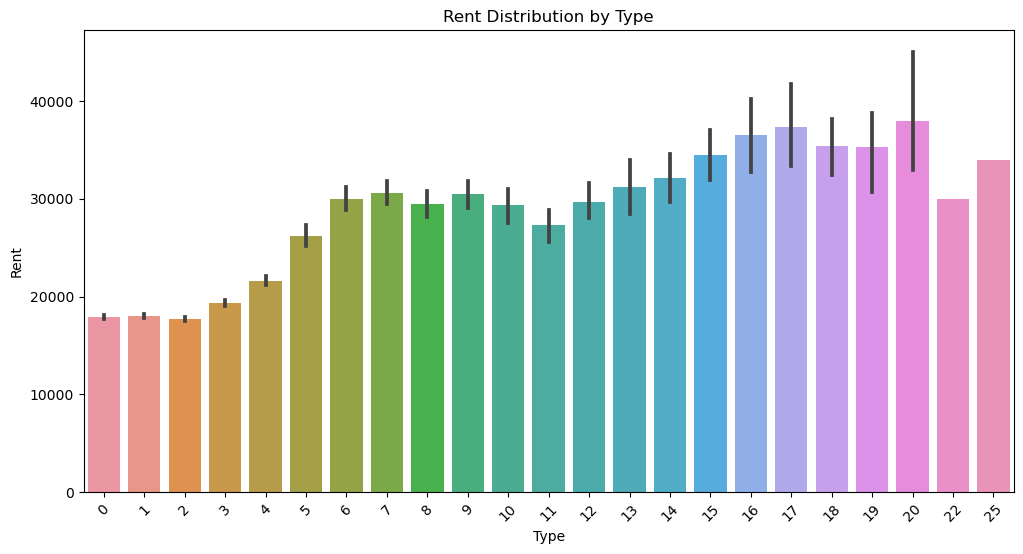

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='floor' , y='rent' , data=df)
plt.title('Rent Distribution by Floor')
plt.xlabel('Floor')
plt.ylabel('Rent')
plt.show()

*Comparing the rent and floor levels in the data, we can see that the plot resembles a camel hump. Up to the 4th floor, the rent is low, and after that, it can be considered medium.*

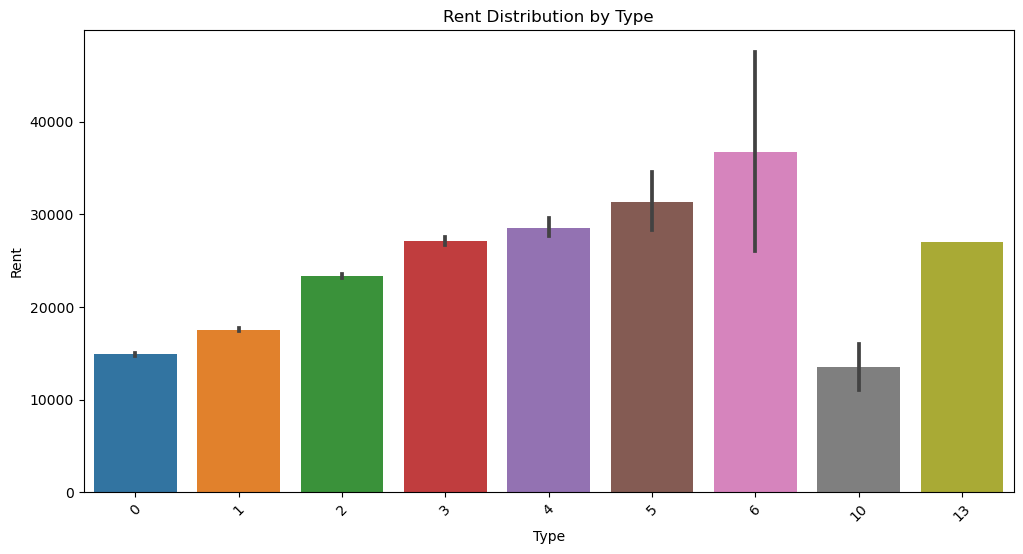

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='balconies' , y='rent' , data=df)
plt.title('Rent Distribution by balconies')
plt.xlabel('Balconies')
plt.ylabel('Rent')
plt.show()

*Peoples are used for growing plants, working, etc. In the above plot, we can see that the number of balconies increases the rent, but only up to a limit of six.*

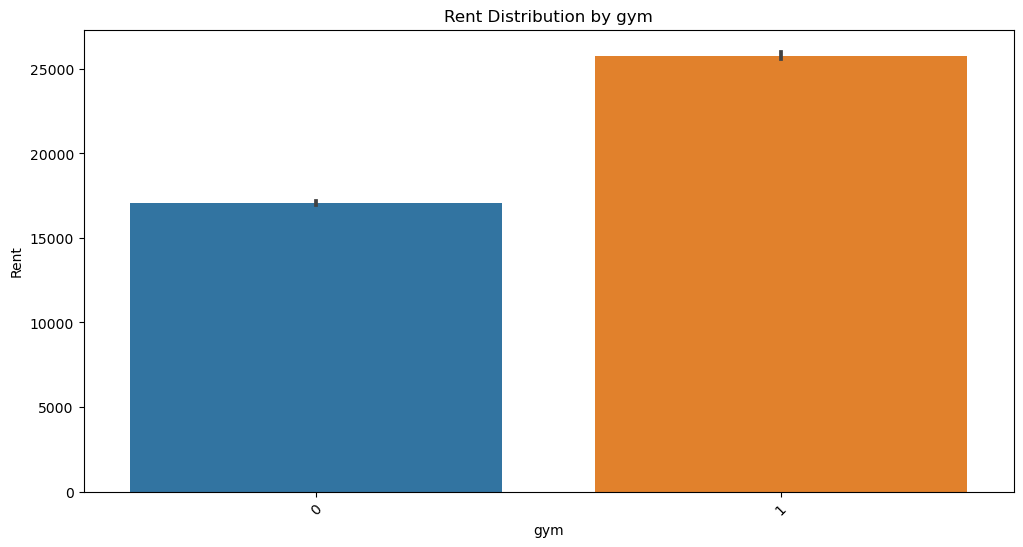

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x='gym' , y='rent' , data=df)
plt.title('Rent Distribution by gym')
plt.xlabel('gym')
plt.ylabel('Rent')
plt.show()

*Nowadays, everyone wants to stay fit. By providing a gym inside the building, we can charge higher rent.*

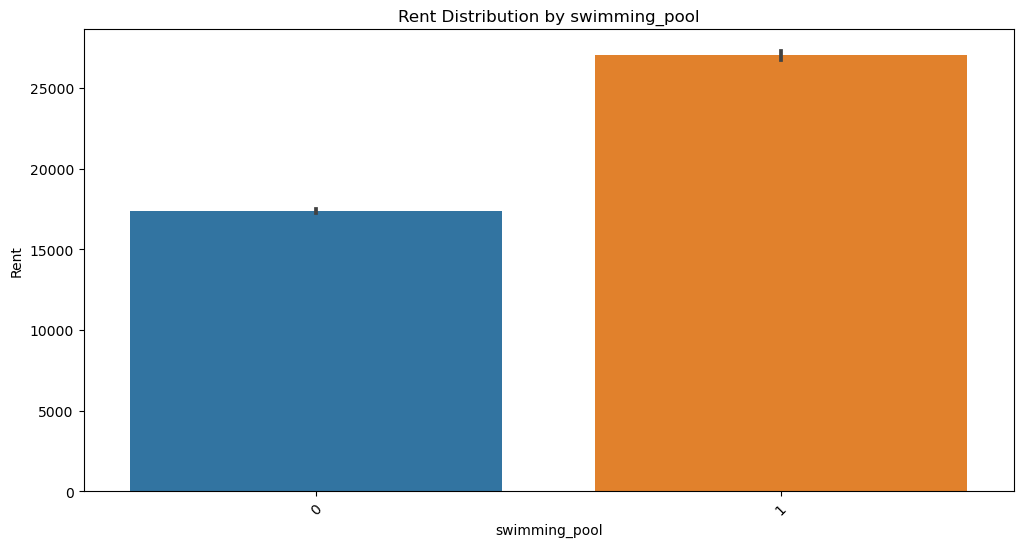

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='swimming_pool' , y='rent' , data=df)
plt.title('Rent Distribution by swimming_pool')
plt.xlabel('swimming_pool')
plt.ylabel('Rent')
plt.show()

*A swimming pool is not a mandatory feature for a building, but it allows us to charge higher rent*

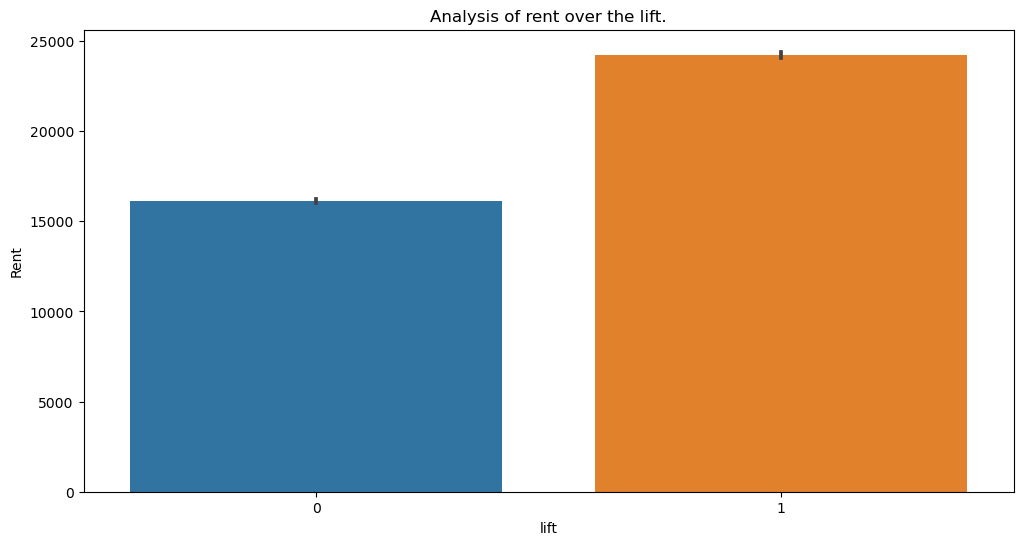

In [199]:
plt.figure(figsize=(12,6))
sns.barplot(x='lift' , y='rent' , data=df)
plt.title('Analysis of rent over the lift.')
plt.xlabel('lift')
plt.ylabel('Rent')
plt.show()

*In the above plot, we can see that buildings with lifts can command higher rent.*

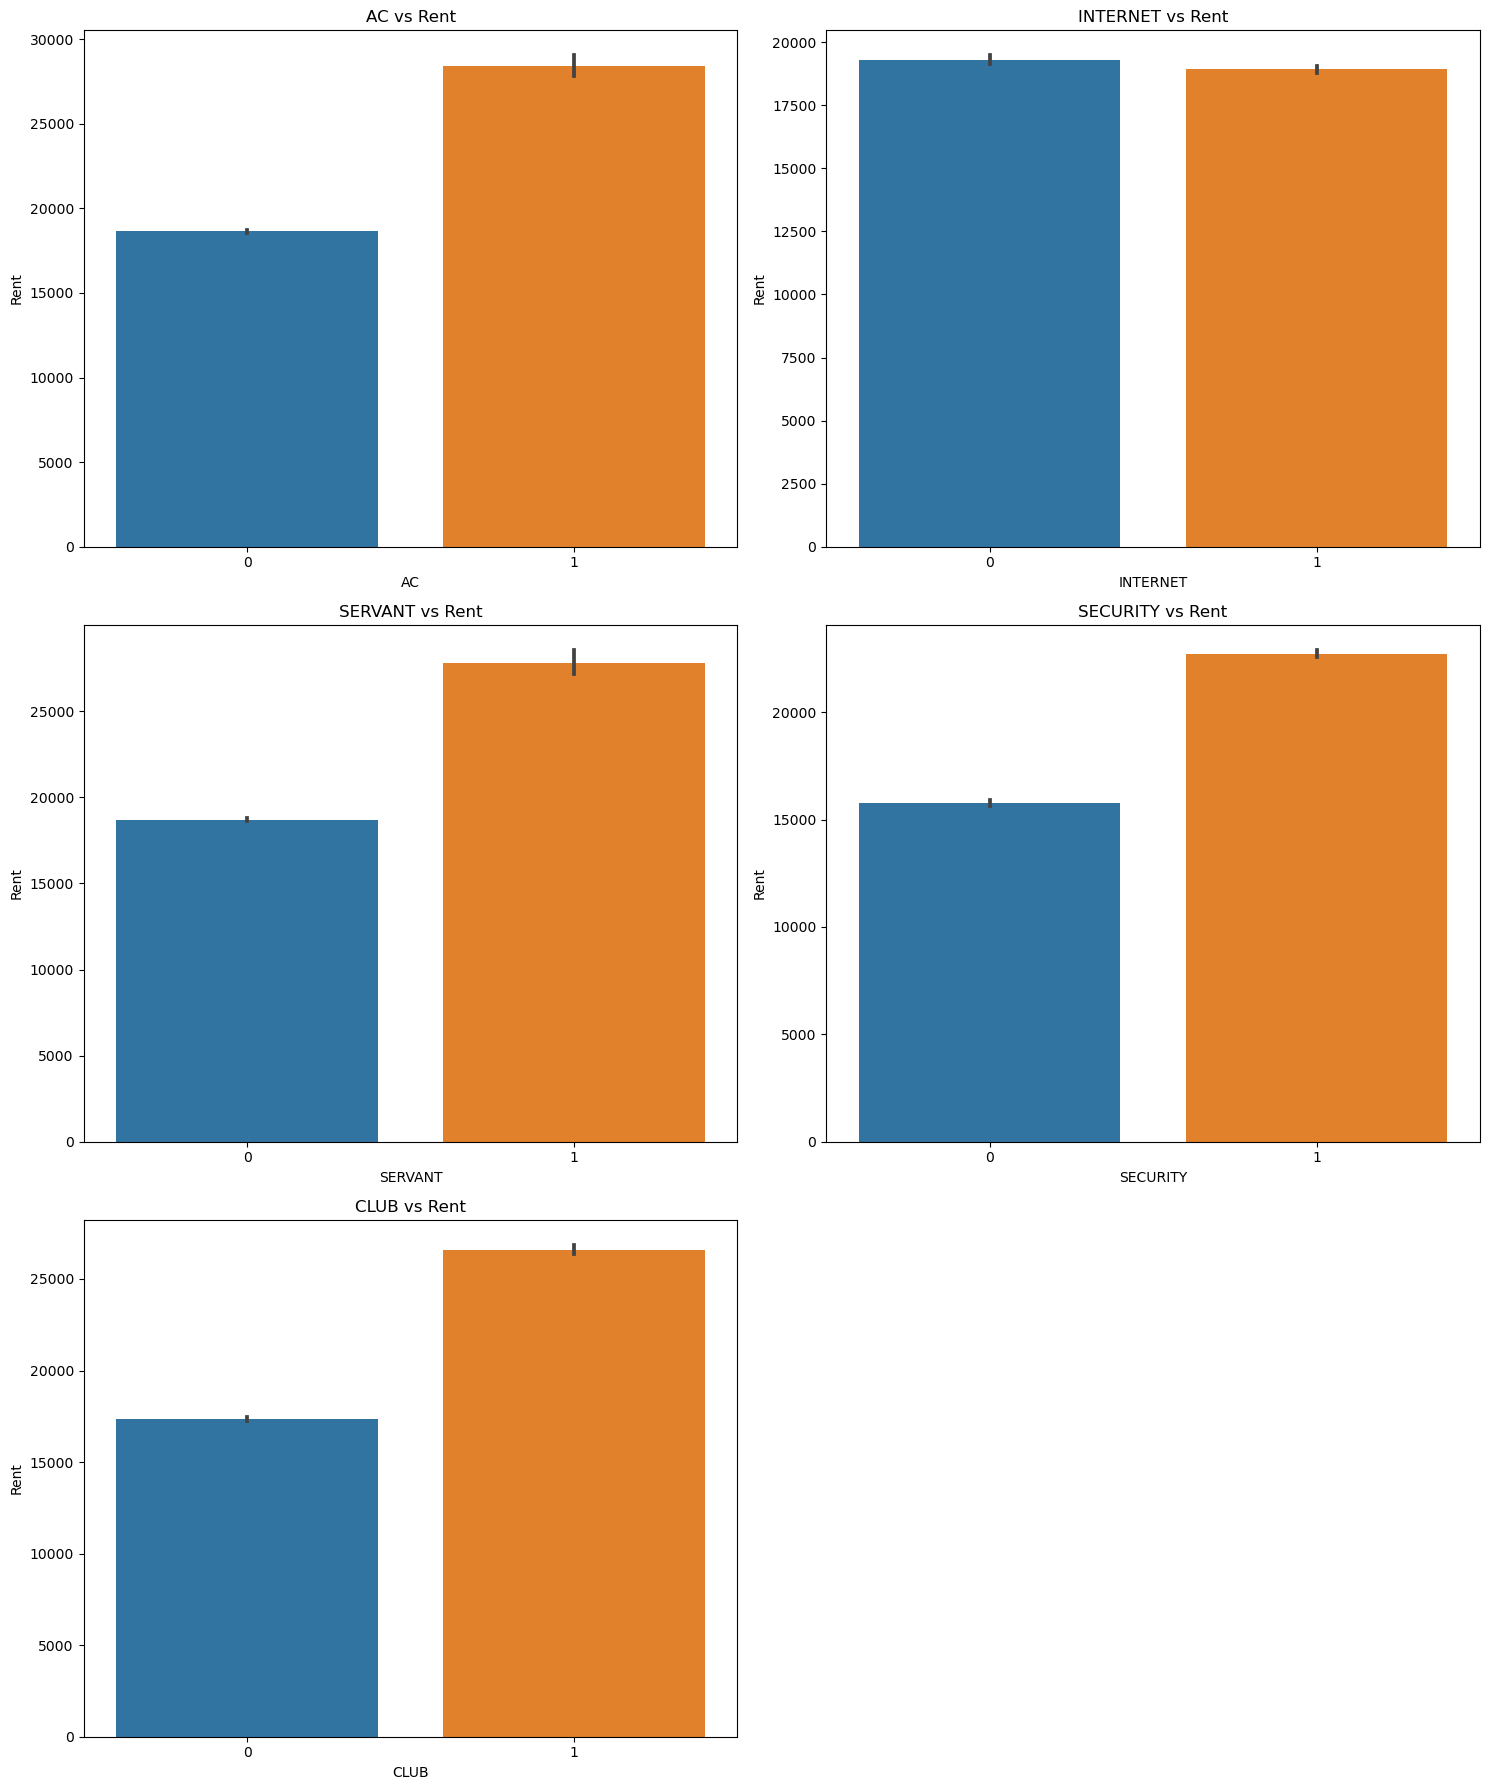

In [44]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of columns to plot
columns = ['AC', 'INTERNET', 'SERVANT', 'SECURITY', 'CLUB']

# Plot each column
for i, col in enumerate(columns):
    sns.barplot(x=col, y='rent', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Rent')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Rent')

# Remove the empty subplot
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


### In the above amenities analysis:
   *In the case of Internet, there is no difference in rent whether the property has Internet or not. Similarly, amenities like Servant,ac, Security, and Club have a significant influence on the rent. Properties with these four amenities have higher rent compared to those without these amenities.*

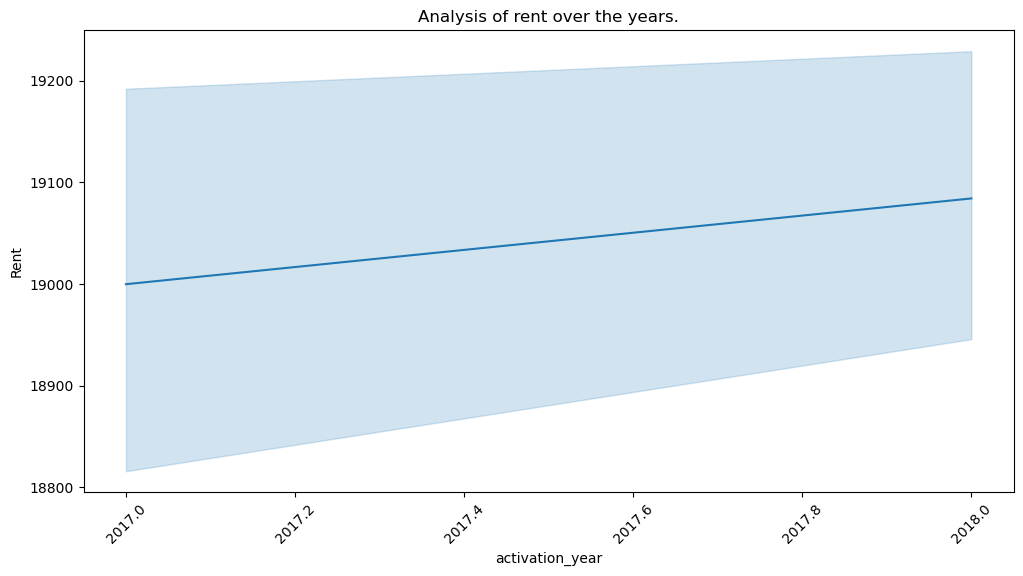

In [197]:
plt.figure(figsize=(12,6))
sns.lineplot(x='activation_year' , y='rent' , data=df)
plt.title('Analysis of rent over the years.')
plt.xlabel('activation_year')
plt.ylabel('Rent')
plt.xticks(rotation= 45)
plt.show()

*In the above plot we can to understading that rent is increasing gradualy every 2 months.It is a linear grouth*

###  label Encoder 

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['locality'] = le.fit_transform(df['locality'])
df['lease_type'] = le.fit_transform(df['lease_type'])
df['furnishing'] = le.fit_transform(df['furnishing'])
df['parking'] = le.fit_transform(df['parking'])
df['facing'] = le.fit_transform(df['facing'])
df['water_supply'] = le.fit_transform(df['water_supply'])
df['building_type'] = le.fit_transform(df['building_type'])

In [167]:
#spliting attributes and lable column
X = df.drop('rent', axis=1)
y = df['rent']
X.shape, y.shape

In [169]:
from sklearn.model_selection import train_test_split

# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Random Forest

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a RandomForestRegressor model
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=3)

# Fit the model
RForest.fit(X_train,y_train)

# Make predictions
y_predict=RForest.predict(X_test)

In [196]:
# Calculate metrics for regression
mse = mean_squared_error(y_test, y_predict)
rmse = mse**0.5 # Root Mean Squared Error
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 13838271.025174402
Root Mean Squared Error: 3719.982664633587
R-squared: 0.8000703327156262


## Gradient Boosting

In [190]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


# Assuming you have features X and target y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [191]:
# Calculate metrics for regression
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 13041372.975932037
Root Mean Squared Error: 3611.2841173095253
R-squared: 0.811583589072201
